# Fairfield Country Random Forest Traffic Analysis 
by [David Roberts](https://www.kaggle.com/davidroberts13) Sep 2020

*In this notebook, we will explore, manipulate, and analyze highway crashes in CT's Fairfield County. More specifically, their influence on traffic. Through the utilization of a Random forest, our goal is to accurately predict the severity or level of impact on traffic an accident has.*

![s](https://mocah.org/uploads/posts/5322598-forest-traffic-road-tree-windy-road-night-winter-snow-nature-light-trail-long-exposure-dark-landscape-pine-fur-wood-fujifilm-night-light-traffic-road-car-light-free-pictures.jpg)


### Table of Contents

* [1.Introduction](#chapter1)
   * [1.1 Load and Check Data](#section_1_1)
   * [1.2 Scope](#section_1_1)
   * [1.3 Data Type Manipulation](#section_1_3)
* [2. Feature Engineering](#chapter2)
    * [2.1 Missing Values and Imputation](#section_2_1)
    * [2.2 Handling Outliers (Weather/City)](#section_2_2)
    * [2.3 Extracting Date](#section_2_3)
    * [2.4 Binning](#section_2_4)
    * [2.5 One-Hot Encoding](#section_2_5)
* [3. Visulaization](#chapter4)
    * [3.1 Geospacial (Folium)](#section_3_1)
    * [3.2 Word Clouds](#section_3_2)
* [4. Machine Learning](#chapter5)
    * [4.1 Model Selection](#section_4_1)
    * [4.2 Training](#section_4_2)
    * [4.3 Model Evaluation](#section_4_3)
* [5. Conclusion](#chapter6)

   

## 1.Introduction <a class="anchor" id="chapter1"></a>

#### *Business Problem:*
   Automotive collisions have become a ubiquitous aspect of modern life. These accidents claim the lives and livelihoods of millions of people a year all over the world.  A study by the Department of Transportation's, [National Highway Traffic Saftey Administration](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812013) (NHTSA), placed a price tag of over a quarter-trillion dollars in 2010.  I have seen several projects diving into this problem from the perspective of loss of life property or employment, all of which are noble in nature. I want to explore something else, something more trivial, and infuriating TRAFFIC! That's right, and I will be analyzing and building a machine learning model to predict an accident's impact on traffic. Through analysis of observations like weather, time of year, location, and many more, we might be able to alleviate the modern leech on our precious free time.
   
   By better understanding the critical factors influencing a collision effect on traffic flow, we can reduce the number of total crashes and limit the time they steal from us. If done correctly, this work could help add precious time to our days.  To defeat them, we first understand them as Sun Tzu said, "know your opponent, and you will never lose'. We must learn what makes traffic tick, and we will do it through careful feature engineering and model choice. If we can establish a pattern,  we would deploy available resources to combat these conditions that worsen traffic. 

This analysis will help inform the driver of critical areas better and plan their route accordingly and decision-makers on the local level and above on resource allocation. 
   
   *TLDR* Car crashes have many issues associated with them that are horrible and life-changing. Traffic, however, affects us the most regularly. This analysis will aim to understand better the conditions that make a crash cause a higher traffic load.

#### *Data:*
This US-Accident Dataset is a countrywide dataset covering 49 US states. It has 3.5 million separate traffic accidents taking place from **February 2016** to **December 2019**. 
Based on definition of our problem, factors that will influence our decission are:
* Information describing the collision
* Various measurements and observations of the weather
* Types of roadway or infrastructure involved 
We choose to use the data's entirety in our predictive efforts to better our target audience of governmental decision-makers. Remember, severity is only relational to the impact an accident has on traffic flow and will be our target variable in our later analysis.

#### *Acknowledgments:*
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. "A Countrywide Traffic Accident Dataset.", 2019. Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In Proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

### 1.1 Load and Check Data <a class="anchor" id="section_1_1"></a>

In [45]:
#required librarys
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline

from sklearn.preprocessing import LabelEncoder #For Label Encoding 
#path to file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None) #allows us to see all the columns avoiding the dreded '...'

#Word Cloud 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

#Reading Data
df=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_June20.csv')

df.head(3)

/kaggle/input/car-silhouette/rTjrBzMec.jpg
/kaggle/input/car-silhouette/car-silhouette-2-12.jpg
/kaggle/input/car-silhouette/car.png
/kaggle/input/car-silhouette/Car_mask2.jpg
/kaggle/input/car-silhouette/car-silhouette-vector-free-22.png
/kaggle/input/car-silhouette/Car_mask3.jpg
/kaggle/input/car-silhouette/beauty-and-the-beast-silhouette-clip-art-11.png
/kaggle/input/car-silhouette/Car_mask1.jpg
/kaggle/input/car-silhouette/ziX57q6BT.jpg
/kaggle/input/car-silhouette/car.jpg
/kaggle/input/car-silhouette/764270.jpg
/kaggle/input/car-silhouette/beauty-and-the-beast-silhouette-clip-art-12.png
/kaggle/input/car-silhouette/791698.jpg
/kaggle/input/us-accidents/US_Accidents_June20.csv


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


In [46]:
print('if your interested in seeing some descriptive statistics on the overall data set click the following code button bellow')

if your interested in seeing some descriptive statistics on the overall data set click the following code button on the right


In [47]:
print(df.head())
print(df.describe())
print(df.columns)
print(df.info())

    ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  39.865147 -84.058723      NaN      NaN          0.01   
1  39.928059 -82.831184      NaN      NaN          0.01   
2  39.063148 -84.032608      NaN      NaN          0.01   
3  39.747753 -84.205582      NaN      NaN          0.01   
4  39.627781 -84.188354      NaN      NaN          0.01   

                                         Description  Number  \
0  Right lane blocked due to accident on I-70 Eas...     NaN   
1  Accident on Brice Rd at Tussing Rd. Exp

In [48]:
print('The shape of the raw data from the dataset is:',df.shape,',and that is just not gonna happen!')

The shape of the raw data from the dataset is: (3513617, 49) ,and that is just not gonna happen!


### 1.2 Scope <a class="anchor" id="section_1_2"></a>
Now, as you could see, this data set is far too large for my old laptop to handle without catching my desk on fire, so we will need to widdle it down to a more appropriate level. We will be focusing our efforts on just Fairfield county, the most South Western county in Connecticut with several larger(ish) Cities and many commuters. 

In [49]:
#First we will subset our data down to just the state level
df_CT=df.loc[df['State']=='CT'].copy()
#County level 
df_FF=df_CT.loc[df_CT['County']=='Fairfield'].copy()
print('The new shape after defining the scope:',df_FF.shape,',that is something i can work with')
pd.set_option('display.max_columns', None)
df_FF.head(1)

The new shape after defining the scope: (6874, 49) ,that is something i can work with


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
194261,A-194263,MapQuest,201.0,2,2016-11-30 15:56:34,2016-11-30 17:13:41,41.17836,-73.165665,NaN,NaN,0.01,Accident pedestrian involved on CT-130 Stratfo...,851.0,Central Ave,L,Bridgeport,Fairfield,CT,06607-1310,US,US/Eastern,KBDR,2016-11-30 15:59:00,53.1,NaN,93.0,29.87,1.5,East,15.0,0.06,Heavy Rain,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


### 1.3 Boolean Manipulation <a class="anchor" id="section_1_3"></a>

*As we can see in the head()'s that we've shown so far, we have many Boolean operations, but how useful are they?*

In [50]:
print(df_FF.shape)
print(df_FF['Amenity'].value_counts())#Only 20 True Observations 
print(df_FF['Bump'].value_counts())#No True Observations 
print(df_FF['Crossing'].value_counts())#86 True Observations
print(df_FF['Give_Way'].value_counts())#No True Observations 
print(df_FF['Junction'].value_counts())#807 True Observations
print(df_FF['No_Exit'].value_counts())#Only 1 True Observations
print(df_FF['Railway'].value_counts())#Only 5 True Observations
print(df_FF['Roundabout'].value_counts())#No True Observations 
print(df_FF['Station'].value_counts())#Only 3 True Observations
print(df_FF['Stop'].value_counts())#Only 31 True Observations
print(df_FF['Traffic_Calming'].value_counts())#No True Observations 
print(df_FF['Traffic_Signal'].value_counts())#181 True Observations
print(df_FF['Turning_Loop'].value_counts())#No True Observations 

(6874, 49)
False    6854
True       20
Name: Amenity, dtype: int64
False    6874
Name: Bump, dtype: int64
False    6788
True       86
Name: Crossing, dtype: int64
False    6874
Name: Give_Way, dtype: int64
False    6067
True      807
Name: Junction, dtype: int64
False    6873
True        1
Name: No_Exit, dtype: int64
False    6869
True        5
Name: Railway, dtype: int64
False    6874
Name: Roundabout, dtype: int64
False    6871
True        3
Name: Station, dtype: int64
False    6843
True       31
Name: Stop, dtype: int64
False    6874
Name: Traffic_Calming, dtype: int64
False    6693
True      181
Name: Traffic_Signal, dtype: int64
False    6874
Name: Turning_Loop, dtype: int64


As we can see above 10 of the 13 columns have 1% or less true values. this is not substantial enough to keep them in the analysis. The 3 that demonstrate a significant amount will stay for further manipulation. 

In [51]:
#The 10 columns that are almost entirely false and thus not useful
df_FF.drop(columns=['Amenity'],axis=1,inplace=True)
df_FF.drop(columns=['Bump'],axis=1,inplace=True)
df_FF.drop(columns=['Stop'],axis=1,inplace=True)
df_FF.drop(columns=['Give_Way'],axis=1,inplace=True)
df_FF.drop(columns=['No_Exit'],axis=1,inplace=True)
df_FF.drop(columns=['Railway'],axis=1,inplace=True)
df_FF.drop(columns=['Roundabout'],axis=1,inplace=True)
df_FF.drop(columns=['Station'],axis=1,inplace=True)
df_FF.drop(columns=['Traffic_Calming'],axis=1,inplace=True)
df_FF.drop(columns=['Turning_Loop'],axis=1,inplace=True)

#Just a couple of extra columns that do not give us enough information on their own to warrant staying.
df_FF.drop(columns=['Nautical_Twilight'],axis=1,inplace=True) #Closely associated with Sunset, so they will not add to our analysis 
df_FF.drop(columns=['Astronomical_Twilight'],axis=1,inplace=True)
df_FF.drop(columns=['Civil_Twilight'],axis=1,inplace=True)

#Now to convert the remaining Boolean objects into intiger objects. 
df_FF['Junction']=df_FF['Junction'].astype(int)
df_FF['Crossing']=df_FF['Crossing'].astype(int)
df_FF['Traffic_Signal']=df_FF['Traffic_Signal'].astype(int)


In [52]:
df_FF.head(1)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset
194261,A-194263,MapQuest,201.0,2,2016-11-30 15:56:34,2016-11-30 17:13:41,41.17836,-73.165665,NaN,NaN,0.01,Accident pedestrian involved on CT-130 Stratfo...,851.0,Central Ave,L,Bridgeport,Fairfield,CT,06607-1310,US,US/Eastern,KBDR,2016-11-30 15:59:00,53.1,NaN,93.0,29.87,1.5,East,15.0,0.06,Heavy Rain,0,0,1,Day


We can see that we are making significant progress. However, there are still many columns that we can see will not help the analysis we are doing, so we will drop them.

In [53]:
df_FF.drop(columns=['ID'],axis=1,inplace=True) #Superfluous 
df_FF.drop(columns=['Country'],axis=1,inplace=True) #This is a uniform column displaying just the 'US'
df_FF.drop(columns=['State'],axis=1,inplace=True) #This is a uniform column displaying just 'CT' 
df_FF.drop(columns=['County'],axis=1,inplace=True)#This is a uniform column displaying just 'Fairfield'
df_FF.drop(columns=['Timezone'],axis=1,inplace=True) #This is a uniform column displaying just 'US/Eastern'
df_FF.drop(columns=['Airport_Code'],axis=1,inplace=True)#Who cares about airport code, am I right?
df_FF.drop(columns=['Weather_Timestamp'],axis=1,inplace=True)#This relates to what time the weather data was recorded

In [54]:
df_FF.head(1)

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset
194261,MapQuest,201.0,2,2016-11-30 15:56:34,2016-11-30 17:13:41,41.17836,-73.165665,NaN,NaN,0.01,Accident pedestrian involved on CT-130 Stratfo...,851.0,Central Ave,L,Bridgeport,06607-1310,53.1,NaN,93.0,29.87,1.5,East,15.0,0.06,Heavy Rain,0,0,1,Day


Now, this is starting to look good! Don't you think?

## 2.Feature Engineering <a class="anchor" id="chapter2"></a>

Generally speaking, this is the process of extracting features from raw data using domain knowledge. We will do so much, but first, we should see how tidy our data look for that I like to use a nifty little visualization. It will show us a big blue box with yellow lines representing a missing value in that category. Our goal is to remove all these yellow lines. 

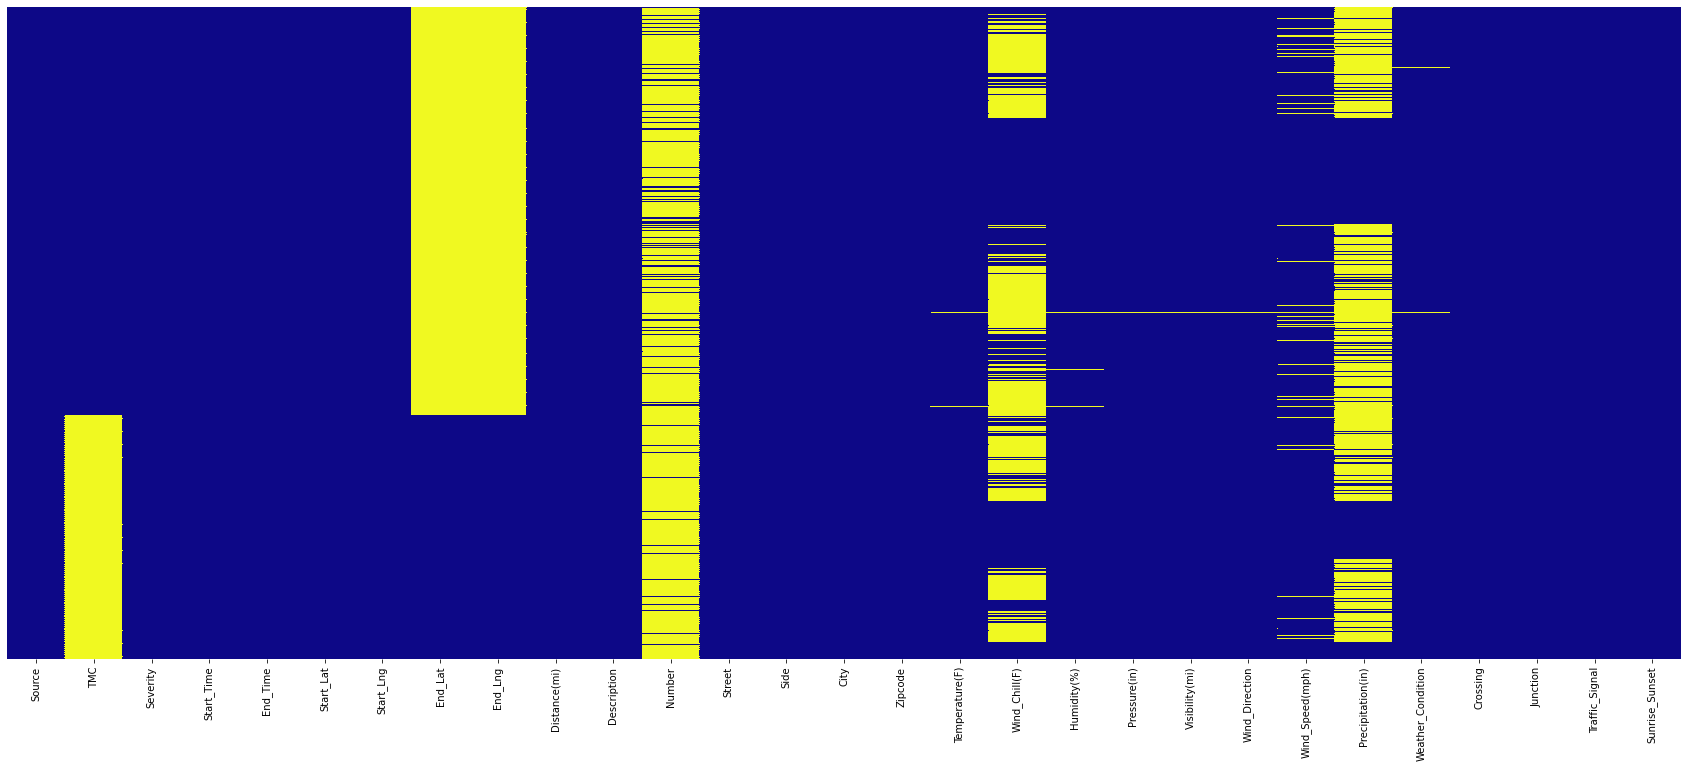

In [55]:
plt.figure(figsize=(30,12))
sns.heatmap(df_FF.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.show()

Okay, not too bad! 13 columns are affected by missing values. We will remove outright like he 'End_Lat/Lng' and 'Number' column as they are not useful. Then some will need imputation work like 'Wind_Speed(mph),' 'Wind_Chill(F),' and others. Some of these like 'TMC,' 'Weather_Conditions,' will require a closer examination.

In [56]:
#Far to many missing values to keep these columns and they dont add much to our analysis so the decision is easy
df_FF.drop(columns=['End_Lat','End_Lng', 'Number'],axis=1,inplace=True) 
df_FF.head(1)

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset
194261,MapQuest,201.0,2,2016-11-30 15:56:34,2016-11-30 17:13:41,41.17836,-73.165665,0.01,Accident pedestrian involved on CT-130 Stratfo...,Central Ave,L,Bridgeport,06607-1310,53.1,NaN,93.0,29.87,1.5,East,15.0,0.06,Heavy Rain,0,0,1,Day


### 2.1 Missing Values and Imputation <a class="anchor" id="section_2_1"></a>
We are not sure why these pieces of data are missing, but we know they must go. Imputation is a critical skill in preprocessing data as Machine Learning Algorithms are allergic to them, so they must go. Statistical imputation's most frequent strategy is replacing missing values with the mean value of the column. This technique gives a rough fix for the missing value but only works if there aren't too many missing data pieces.

In [57]:
df_FF['Wind_Chill(F)'].fillna(df_FF['Wind_Chill(F)'].mean(),inplace=True)
df_FF['Wind_Speed(mph)'].fillna(df_FF['Wind_Speed(mph)'].mean(),inplace=True)
df_FF['Visibility(mi)'].fillna(df_FF['Visibility(mi)'].mean(),inplace=True)
df_FF['Precipitation(in)'].fillna(df_FF['Precipitation(in)'].mean(),inplace=True) 
df_FF['Temperature(F)'].fillna(df_FF['Temperature(F)'].mean(),inplace=True)
df_FF['Humidity(%)'].fillna(df_FF['Humidity(%)'].mean(),inplace=True)
df_FF['Pressure(in)'].fillna(df_FF['Pressure(in)'].mean(),inplace=True)

Ps. Precipitation has a rather high amount of missing vlaues but our area has rather low precipitation numbers and if precipitation was a factor in the crash it would likey be mentioned in the report. Odds are if it was left out it was not a factor

### 2.2 Extracting Date  <a class="anchor" id="section_2_2"></a>
DateTime data comes in many forms. It's paramount we can grab these values no matter how they are written and massage them into something we can use. I find Pandas to do this exceptionally well.

In [58]:
#Converting the giving time data into workable Date-time objects
df_FF['Start_Time']=pd.to_datetime(df_FF['Start_Time'],infer_datetime_format=True)

#Breaking the start end time into usable independant features 
df_FF['Year'] = df_FF['Start_Time'].dt.year
df_FF['Month'] = df_FF['Start_Time'].dt.month
df_FF['Day'] = df_FF['Start_Time'].dt.day
df_FF['Time_S'] = df_FF['Start_Time'].dt.hour
df_FF['Weekday']=df_FF['Start_Time'].dt.weekday
df_FF.drop(columns=['Start_Time','End_Time'],axis=1,inplace=True) # supurfluous now


### 2.3 One-Hot Encoding <a class="anchor" id="section_2_3"></a>

Categorical data like color 'Red,' 'Blue,' 'Green,' or in our case, we are looking at 'Weather_Conditions' and 'City' is standard. This data has a rich amount of information in it that we can understand as smart monkeys. On the other hand, our computers can't make heads or tails of it, at least at my current level. To enlist the help of our computers, we must use these categorical columns into numeric ones. So we must change them into a langue our computers can understand like NUMBERS! We have a couple of options [here](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/) l like Integer Encoding, mapping each label to an integer, One Hot encoding. Each label gets mapped to a binary vector. Learned Embedding, where a distributed representation of the categories are discovered and extracted. For our purpose, One hot is the best bet as its most effective when there is no relationship between the categorical variables. This type of conversion makes the data a tad unwieldy, so we'll save the conversion for later, but we will be finalizing its prep in this section.

We will handle 'Weather_Condition' first. But I seem to remember that we need to fix a handful of missing values before moving on to One-Hot.

In [59]:
df_FF[df_FF['Weather_Condition'].isnull()]

,Source,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Time_S,Weekday
194536,MapQuest,201.0,3,41.136505,-73.291199,2.530,Accident on I-95 Northbound from Exit 18 Sherw...,Governor John Davis Lodge Tpke,R,Southport,06890,54.913096,41.540156,64.757172,29.840000,8.892504,North,9.489989,0.022254,NaN,0,0,0,Night,2016,12,2,3,4
194540,MapQuest,201.0,3,41.198647,-73.118042,0.010,Accident on I-95 Northbound at Exit 33 US-1 Ba...,I-95 N,R,Stratford,06615,54.913096,41.540156,64.757172,29.870000,8.892504,North,9.489989,0.022254,NaN,0,0,0,Night,2016,12,2,5,4
194545,MapQuest,201.0,3,41.190434,-73.134026,0.010,Accident on I-95 Northbound at Exit 32 Broad St.,I-95 N,R,Stratford,06615,54.913096,41.540156,64.757172,29.870000,8.892504,North,9.489989,0.022254,NaN,0,0,0,Night,2016,12,2,5,4
203248,MapQuest,201.0,2,41.232285,-73.220505,0.010,Accident on CT-15 Southbound near Exit 48 CT-1...,Main St,L,Trumbull,06611-4745,54.913096,41.540156,64.757172,30.380000,8.892504,North,9.489989,0.022254,NaN,0,0,0,Night,2016,11,1,4,1
211793,MapQuest,229.0,3,41.138969,-73.287910,0.010,Slow traffic and right lane closed due to acci...,Post Rd,R,Southport,06890,54.913096,41.540156,64.757172,30.380000,8.892504,North,9.489989,0.022254,NaN,0,0,0,Day,2016,10,15,16,5
211886,MapQuest,201.0,2,41.164024,-73.358040,0.010,Accident on CT-15 Southbound at Exit 42 CT-57 ...,CT-15 S,R,Westport,06880,54.913096,41.540156,64.757172,30.030000,8.892504,WSW,11.500000,0.022254,NaN,0,1,0,Day,2016,10,16,17,6
211887,MapQuest,201.0,2,41.164604,-73.355659,0.010,Accident on CT-15 Northbound at Exit 42 CT-57 ...,Merritt Pkwy N,R,Westport,06880,54.913096,41.540156,64.757172,30.030000,8.892504,WSW,11.500000,0.022254,NaN,0,0,0,Day,2016,10,16,18,6
211931,MapQuest,201.0,3,41.166878,-73.217087,0.010,Accident on I-95 Northbound near Exit 25 Pine St.,Fairfield Ave,R,Bridgeport,06605-2239,54.913096,41.540156,64.757172,29.960000,8.892504,North,9.489989,0.022254,NaN,0,0,0,Day,2016,10,17,7,0
212000,MapQuest,201.0,3,41.120365,-73.374786,1.710,Left lane blocked due to accident on I-95 Nort...,I-95 N,R,Westport,06880,54.913096,41.540156,64.757172,29.960000,8.892504,North,9.489989,0.022254,NaN,0,0,0,Day,2016,10,17,12,0
212082,MapQuest-Bing,201.0,2,41.234146,-73.200706,0.010,Accident on CT-15 Northbound at Exits 49 49N 4...,Merritt Pkwy N,R,Trumbull,06611,54.913096,41.540156,64.757172,29.930000,8.892504,North,9.489989,0.022254,NaN,0,0,0,Night,2016,10,18,6,1


Ahhh, yes, we might find some. These are simple errors and seem to all be from the same time and day. Which makes it easy we will be able to replace them all with the same value. But we must make sure we get the language right.

In [60]:
df_FF['Weather_Condition'].fillna(method='ffill',inplace=True) 
df_FF['Wind_Direction'].fillna(method='ffill',inplace=True) #We also have one missing value here we need to fix real quick

### 2.4 Binning <a class="anchor" id="section_2_4"></a>

Binning is another classic weapon in the data scientists' arsenal. This technique is best suited to transform categorical values into subset groups extracting information. For example, grouping credit scores into excellent, fair, and bad allows for new analysis on these bins or buckets. It can also be called bucketing.

In [61]:
#Define bins for time (24 hour time) 0 to 6, 6-12, 12-18,18-24
timeBins=[-1,6,12,18,24]
tBin_names=['Early Morning','Morning','Afternoon','Evening']
df_FF['TimeofDay']=pd.cut(df_FF['Time_S'],timeBins,labels=tBin_names)
df_FF.head(5)

,Source,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Time_S,Weekday,TimeofDay
194261,MapQuest,201.0,2,41.178360,-73.165665,0.01,Accident pedestrian involved on CT-130 Stratfo...,Central Ave,L,Bridgeport,06607-1310,53.1,41.540156,93.0,29.87,1.5,East,15.0,0.060000,Heavy Rain,0,0,1,Day,2016,11,30,15,2,Afternoon
194282,MapQuest,201.0,2,41.121334,-73.406853,0.01,Accident on US-1 North Ave at CT-53 East Ave.,North Ave,R,Norwalk,06851-3815,52.0,41.540156,89.0,29.83,4.0,East,20.7,0.030000,Light Rain,0,0,0,Night,2016,11,30,17,2,Afternoon
194334,MapQuest,201.0,2,41.094528,-73.632339,0.01,Accident on CT-15 Southbound at Exit 31 North St.,CT-15 S,R,Greenwich,06830,48.9,41.540156,86.0,29.54,10.0,West,6.9,0.000000,Mostly Cloudy,0,0,0,Night,2016,12,1,6,3,Early Morning
194337,MapQuest,244.0,2,41.180119,-73.194717,0.01,Shoulder blocked due to accident on CT-8 CT-25...,Lafayette Sq,R,Bridgeport,06604,51.1,41.540156,83.0,29.55,10.0,West,5.8,0.022254,Scattered Clouds,0,0,0,Night,2016,12,1,6,3,Early Morning
194459,MapQuest,201.0,3,41.417877,-73.290779,0.01,Accident on I-84 Eastbound before Exit 10 CT-3...,I-84 W,R,Sandy Hook,06482,51.8,41.540156,54.0,29.61,10.0,WNW,9.2,0.022254,Scattered Clouds,0,0,0,Day,2016,12,1,11,3,Morning


In [62]:
#Define bins for Season (Months) 0 to 2, 2-5, 5-8,8-11,11-12
seasonBins=[-1,2,5,8,11,12]
sBin_names=['Winter','Spring','Summer','Autumn','Winter']
df_FF['Season']=pd.cut(df_FF['Month'],seasonBins,labels=sBin_names,ordered=False)
df_FF.tail(5)

,Source,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Time_S,Weekday,TimeofDay,Season
3509576,Bing,NaN,2,41.106416,-73.416145,0.000,At US-7/Exit 15 - Accident. Lane blocked.,Crescent St,R,Norwalk,06854,81.0,81.0,38.0,29.53,10.0,E,9.0,0.00,Fair,0,0,0,Day,2019,8,15,14,3,Afternoon,Summer
3509605,Bing,NaN,2,41.141892,-73.280491,0.535,Between US-1/Center St/Exit 19 and Mill Plain ...,Governor John Davis Lodge Tpke,R,Southport,06890,77.0,77.0,71.0,29.98,10.0,E,9.0,0.00,Fair,0,0,0,Day,2019,8,15,18,3,Afternoon,Summer
3509609,Bing,NaN,2,41.245661,-73.100105,0.625,Between CT-110/Exit 53 and Milford Pky/Exit 54...,CT-15 N,R,Stratford,06614,77.0,77.0,60.0,29.99,10.0,ESE,8.0,0.00,Fair,0,0,0,Day,2019,8,15,19,3,Evening,Summer
3511114,Bing,NaN,2,41.101350,-73.570400,1.637,Between CT-104/Long Ridge Rd/Exit 34 and CT-13...,Merritt Pkwy N,R,Stamford,06902,81.0,81.0,67.0,29.49,10.0,S,7.0,0.00,Fair,0,0,0,Day,2019,8,19,17,0,Afternoon,Summer
3512164,Bing,NaN,2,41.025530,-73.609490,2.153,Between Indian Field Rd/Exit 4 and US-1/Exit 5...,I-95 N,R,Greenwich,06830,81.0,81.0,74.0,29.39,10.0,WSW,3.0,0.06,Mostly Cloudy,0,0,0,Day,2019,8,21,16,2,Afternoon,Summer


In [63]:
#Define bins for Day_type -1(Mon) to 4(Fri),4(Fri)-6(Sun)
seasonBins=[-1,4,6]
sBin_names=['Weekday','Weekend']
df_FF['Day_Type']=pd.cut(df_FF['Weekday'],seasonBins,labels=sBin_names,ordered=False)
df_FF.tail(5)

,Source,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Time_S,Weekday,TimeofDay,Season,Day_Type
3509576,Bing,NaN,2,41.106416,-73.416145,0.000,At US-7/Exit 15 - Accident. Lane blocked.,Crescent St,R,Norwalk,06854,81.0,81.0,38.0,29.53,10.0,E,9.0,0.00,Fair,0,0,0,Day,2019,8,15,14,3,Afternoon,Summer,Weekday
3509605,Bing,NaN,2,41.141892,-73.280491,0.535,Between US-1/Center St/Exit 19 and Mill Plain ...,Governor John Davis Lodge Tpke,R,Southport,06890,77.0,77.0,71.0,29.98,10.0,E,9.0,0.00,Fair,0,0,0,Day,2019,8,15,18,3,Afternoon,Summer,Weekday
3509609,Bing,NaN,2,41.245661,-73.100105,0.625,Between CT-110/Exit 53 and Milford Pky/Exit 54...,CT-15 N,R,Stratford,06614,77.0,77.0,60.0,29.99,10.0,ESE,8.0,0.00,Fair,0,0,0,Day,2019,8,15,19,3,Evening,Summer,Weekday
3511114,Bing,NaN,2,41.101350,-73.570400,1.637,Between CT-104/Long Ridge Rd/Exit 34 and CT-13...,Merritt Pkwy N,R,Stamford,06902,81.0,81.0,67.0,29.49,10.0,S,7.0,0.00,Fair,0,0,0,Day,2019,8,19,17,0,Afternoon,Summer,Weekday
3512164,Bing,NaN,2,41.025530,-73.609490,2.153,Between Indian Field Rd/Exit 4 and US-1/Exit 5...,I-95 N,R,Greenwich,06830,81.0,81.0,74.0,29.39,10.0,WSW,3.0,0.06,Mostly Cloudy,0,0,0,Day,2019,8,21,16,2,Afternoon,Summer,Weekday


Now we can quickly see what section of the day the accident happened durring and what season of the year. lets quickly examine these new categorys

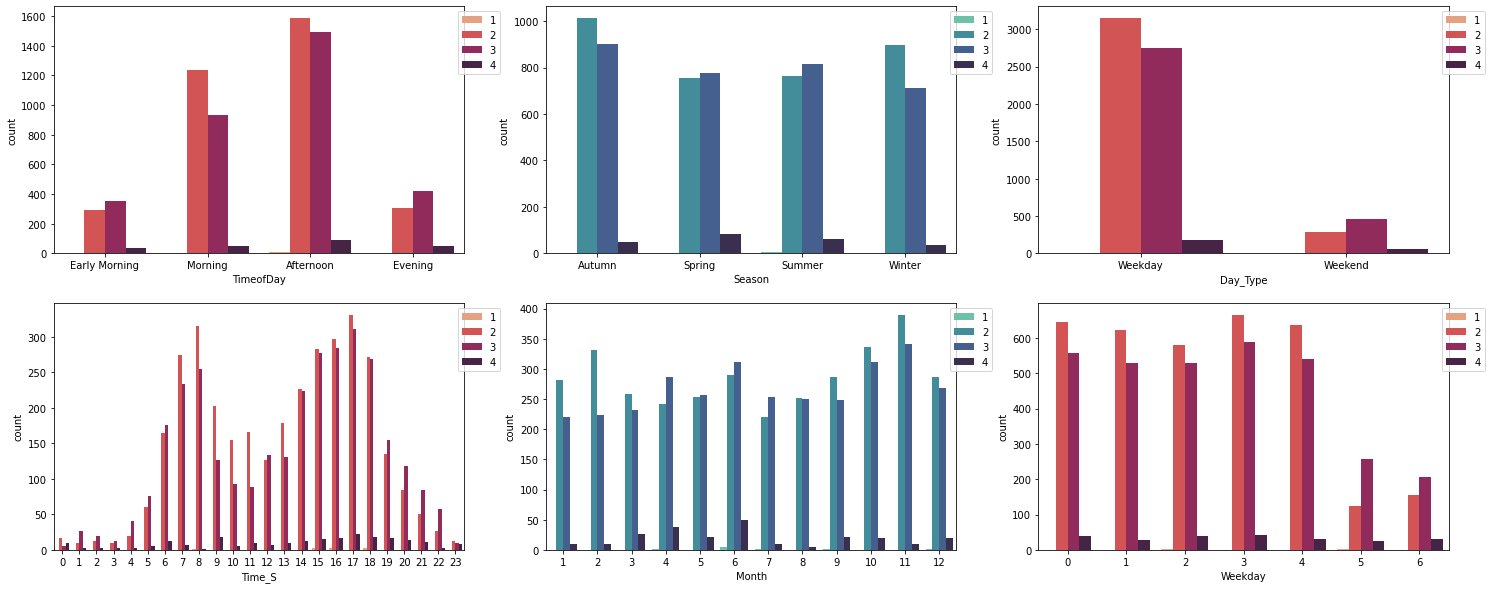

In [64]:
fig, ax =plt.subplots(2,3,figsize=(25,10))
T=sns.countplot(x='TimeofDay',hue='Severity',data=df_FF,ax=ax[0][0],palette='rocket_r')
T.legend(loc='upper right',bbox_to_anchor=(.6, 0.5, 0.5, 0.5))    
t=sns.countplot(x='Time_S',hue='Severity',data=df_FF,ax=ax[1][0],palette='rocket_r')
t.legend(loc='upper right',bbox_to_anchor=(.6, 0.5, 0.5, 0.5))   
S=sns.countplot(x='Season',hue='Severity',data=df_FF,ax=ax[0][1],palette='mako_r')
S.legend(loc='upper right',bbox_to_anchor=(.6, 0.5, 0.5, 0.5))
s=sns.countplot(x='Month',hue='Severity',data=df_FF,ax=ax[1][1],palette='mako_r')
s.legend(loc='upper right',bbox_to_anchor=(.6, 0.5, 0.5, 0.5))
W=sns.countplot(x='Day_Type',hue='Severity',data=df_FF,ax=ax[0][2],palette='rocket_r')
W.legend(loc='upper right',bbox_to_anchor=(.6, 0.5, 0.5, 0.5))
w=sns.countplot(x='Weekday',hue='Severity',data=df_FF,ax=ax[1][2],palette='rocket_r')
w.legend(loc='upper right',bbox_to_anchor=(.6, 0.5, 0.5, 0.5))


fig.show()


We can see both the binned or bucketed data and its raw counterpart. On the left, we have two Seaborn Countplots that show us the relation of commuting and car accident frequency and severity. We can see that the afternoon seems to be a more difficult time of day. Understandably we can expect drivers to be more tired and thus more impaired after a full day of work. One interesting takeaway from the plots on the right is that Autumn seems to be a more dangerous time to be on the road. We found this interesting because our gut would have said that New England winters would have caused a more considerable uptick in accidents than the fall weather. Possibly due to holidays involving travel and the influx of 'Leafers' people who drive through CT to get to the more northern states to see the leaf change color. 

P.S. I mean no office to all the leaf people out there. 

Now we have one last column to handle before we can have some sweet tidy data before moving on to our final feature, and that is 'TMC' or [Traffic Message Channel](https://en.wikipedia.org/wiki/Traffic_message_channel#:~:text=Traffic%20Message%20Channel%20(TMC)%20is,via%20conventional%20FM%20radio%20broadcasts.)
 TMC is a way to communicate traffic information with drivers and observers via FM radio waves originally from Europe. It consists of [thousandas](https://wiki.openstreetmap.org/wiki/TMC/Event_Code_List) of individual packets of data from code: 135 traffic easing to code 1595: boat race. This vast range means imputing a code into the missing values here will be impossible. So we have two choices remove the column, or remove the rows with the missing values. Lets soo how many missing values we have before making this choice.

In [65]:
print('we have',df_FF['TMC'].isna().sum(), 'missing values in the TMC column')
print('out of a total',df_FF.shape)

we have 2567 missing values in the TMC column
out of a total (6874, 32)


That is just too much data to sacrifice to keep the column. We will remove the TMC observation; then, we should have clean and tidy data. We will rerun the missing value visualization to double-check.

In [66]:
df_FF.drop(columns='TMC',inplace=True)

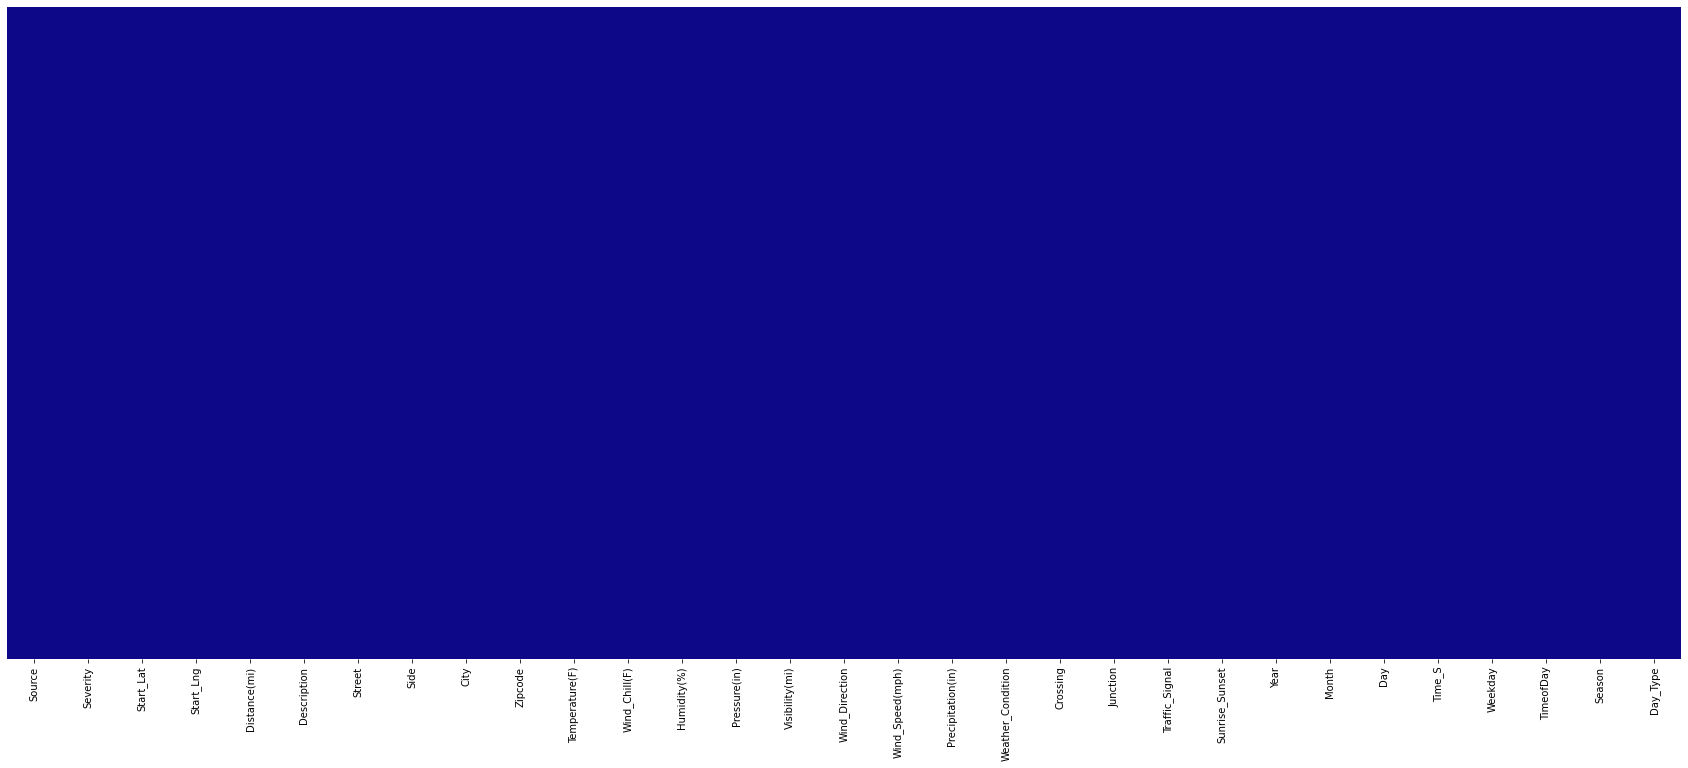

In [87]:
plt.figure(figsize=(30,12))
sns.heatmap(df_FF.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.show()

One Big Ocean perfect! We are ready to move on to some Dummy variables. Oh yeah, and we should make our Sunrise and Side column into integers.

In [68]:
df_FF['Sunrise_Sunset'].replace('Night',0,inplace=True)
df_FF['Sunrise_Sunset'].replace('Day',1,inplace=True)

df_FF['Side'].replace('L',0,inplace=True)
df_FF['Side'].replace('R',1,inplace=True)

Now we are ready!

## 3.Visualizations <a class="anchor" id="chapter3"></a>



### 3.1 Folium Maps <a class="anchor" id="section_3_1"></a>
The cartography class is in session. Folium is a fantastic hybrid of Python data wrangling and Leaflet; its strengths lay in the mapping department. I highly recommend [reading](https://python-visualization.github.io/folium/) up to about this beautiful little library if you haven't yet. I tried to run the whole just our subsetted dataset through my folium maps. Still, I nearly crashed my computer, so we will need to randomly sample our df_FF to make it a more manageable size. Let's start with half of what it currently is.

In [69]:
#Randomly subsetting the data to make it more manageable 
df_FF_half=df_FF.sample(frac=0.5, replace=True, random_state=101)
df_FF_half.head(1)

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Time_S,Weekday,TimeofDay,Season,Day_Type
2639964,Bing,2,41.14162,-73.28335,3.008,Between US-1/Center St/Exit 19 and Sherwood Is...,Governor John Davis Lodge Tpke,1,Southport,06890,57.0,41.540156,72.0,29.96,10.0,East,3.5,0.022254,Clear,0,0,0,1,2017,2,24,10,4,Morning,Winter,Weekday


In [70]:
import folium
#Creating map of our locaiton of choice Fairfield County
FF_map = folium.Map(location=[41.40,-73.263],tiles = 'Stamen Terrain', zoom_start=10)
FF_map

from folium import plugins
from folium.plugins import HeatMap

#Making sure our data is in the correct type
df_FF_half['Start_Lat']=df_FF_half['Start_Lat'].astype(float)
df_FF_half['Start_Lng']=df_FF_half['Start_Lng'].astype(float)

#Subsetting data for visualization
df_FFHeat=df_FF_half[['Start_Lat','Start_Lng']]
df_FFHeat=df_FFHeat.dropna(axis=0,subset=['Start_Lat','Start_Lng'])

#Creating and Attaching heatmap to our map
FFHeat_data=[[row['Start_Lat'],row['Start_Lng']] for index, row in df_FFHeat.iterrows()]
HeatMap(FFHeat_data,blur=10,radius=15,gradient={0.4: 'green', 0.65: 'yellow', 1: 'red'}).add_to(FF_map)

#show
FF_map


*Don't be afraid to get in there and scroll around! Do you see any patterns?*

This next graph is so CPU intensive I'm going to reduce the data to 1/8 to alleviate machine load. By the way, shout out to [Dave Fisher-Hickey](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-analysis) for his amazing first name and folium explainer it helped a lot with this map.

In [71]:
#Reducing data to 1/8 its sice
df_FF_e=df_FF.sample(frac=0.125, replace=True, random_state=101)
df_FF_e.head(1)

#Same Map generation as before
FF_map2 = folium.Map(location=[41.40,-73.263],tiles = 'Stamen Terrain', zoom_start=10)

#Marker Creation
Marker_Map = folium.Map(location=[41.40,-73.263],tiles = 'Stamen Terrain', zoom_start=10)
for i in range(0,len(df_FF_e)):
    folium.Marker([df_FF_e['Start_Lat'].iloc[i],df_FF_e['Start_Lng'].iloc[i]]).add_to(Marker_Map) 
Marker_Map


#Adding labels and colors to our markers 
for i in range(0,len(df_FF_e)):
    Severity = df_FF_e['Severity'].iloc[i]
    if Severity == 1:
        color = 'green'
        popup = folium.Popup('Severity 1', parse_html=True) 
    elif Severity == 2:
        color = 'orange'
        popup = folium.Popup('Severity 2', parse_html=True) 

    elif Severity == 3:
        color = 'red'
        popup = folium.Popup('Severity 3', parse_html=True) 

    else:
        color = 'purple'
        popup = folium.Popup('Severity 4', parse_html=True) 

    
    #Adding our code to the map
    folium.Marker([df_FF_e['Start_Lat'].iloc[i],df_FF_e['Start_Lng'].iloc[i]],popup=popup,icon=folium.Icon(color=color, icon='info-sign')).add_to(Marker_Map)
#Display
Marker_Map

Unsurprisingly as significant highways go through cities, we see a spike in traffic inducing accidents. Can you see anything else?

### 3.2 Word Clouds <a class="anchor" id="section_3_2"></a>
Word Clouds are so much more than a fun way to visualize data. They can help quickly and digestible glean frequency insights for a portion of text.  For this data set, we have a column named description, which lends itself Word-Cloud visualization. The more text data you have, the better a word cloud will perform, so let's check how many of each severity we have. 


Ps. Shouts out to my girl [Aashita Kesarwani](https://www.kaggle.com/aashita) for the assistance getting these to look juuust right.


In [72]:
print(df_FF['Severity'].value_counts())
print('\n')
print('It looks like we should have enough text data for a Word Cloud of Severity levels 2, 3, and 4.')

2    3428
3    3204
4     234
1       8
Name: Severity, dtype: int64


It looks like we should have enough text data for a word cloud of Severity levels 2, 3, and 4.


In [73]:
df_FF_S4=df_FF[df_FF['Severity']==4] #Making subsets for us to use in our wordcloud generation 
df_FF_S3=df_FF[df_FF['Severity']==3]
df_FF_S2=df_FF[df_FF['Severity']==2]


#Custome Color Map for Severity 2
cmap_O = mpl.cm.Oranges(np.linspace(0,1,20))
cmap_O = mpl.colors.ListedColormap(cmap_O[10:,:-1])

#Custome Color Map for Severity 3
cmap_R = mpl.cm.Reds(np.linspace(0,1,20))
cmap_R = mpl.colors.ListedColormap(cmap_R[10:,:-1])

#Custome Color Map for Severity 4
cmap_H = mpl.cm.hot_r(np.linspace(0,1,20))
cmap_H = mpl.colors.ListedColormap(cmap_H[10:,:-1])

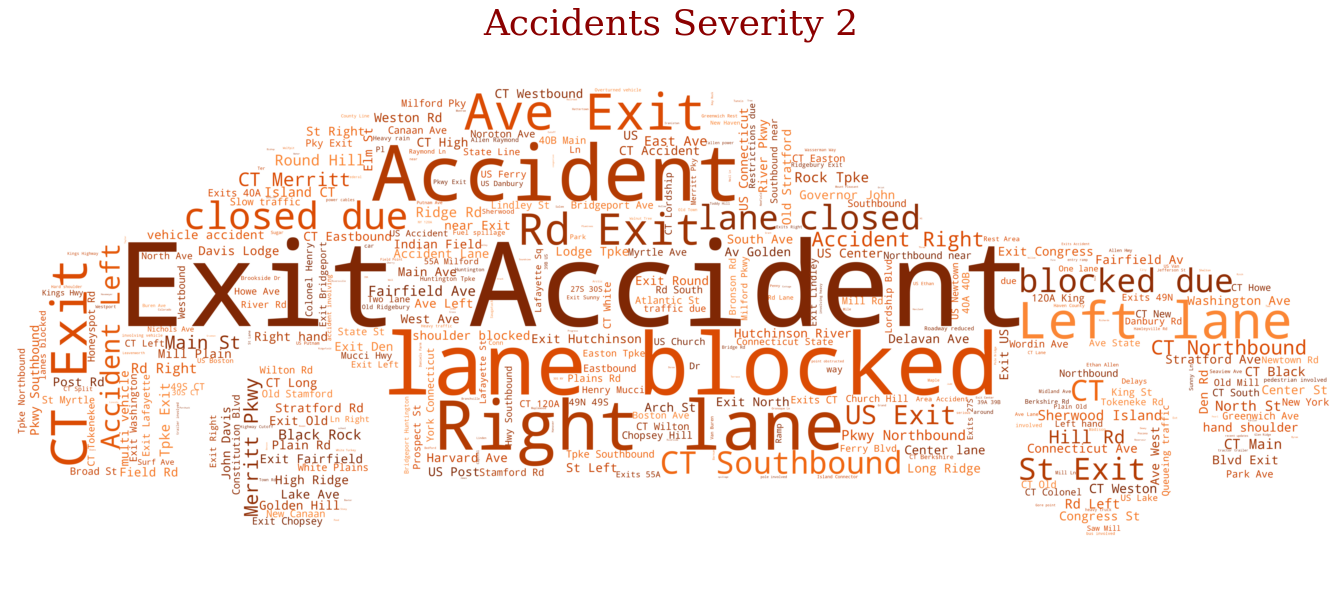

In [74]:
#Font parameters for our Title
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 36,
        }

#Creating variable with data for this Word Cloud
textS2 = ' '.join(df_FF_S2['Description'].tolist())

#Creating Mask for Word Cloud
d = '../input/car-silhouette/'
car_mask = np.array(Image.open(d + 'Car_mask3.jpg'))
stop_words=set(STOPWORDS)

#Word Cloud Creation 
Car_wc=WordCloud(width=400,height=200,mask=car_mask,random_state=101, max_font_size=450,
                 min_font_size=1,stopwords=stop_words,background_color="white",
                 scale=3,max_words=400,collocations=True,colormap=cmap_O)

#Generate Word Cloud
Car_wc.generate(str(textS2))



#show
fig=plt.figure(figsize=(30,10))
plt.ylim(-250,2700)
#plt.xlim(0,2650)
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.axis("off")
plt.title('Accidents: Severity 2',fontdict=font)
plt.imshow(Car_wc,interpolation='bilinear')
plt.show()


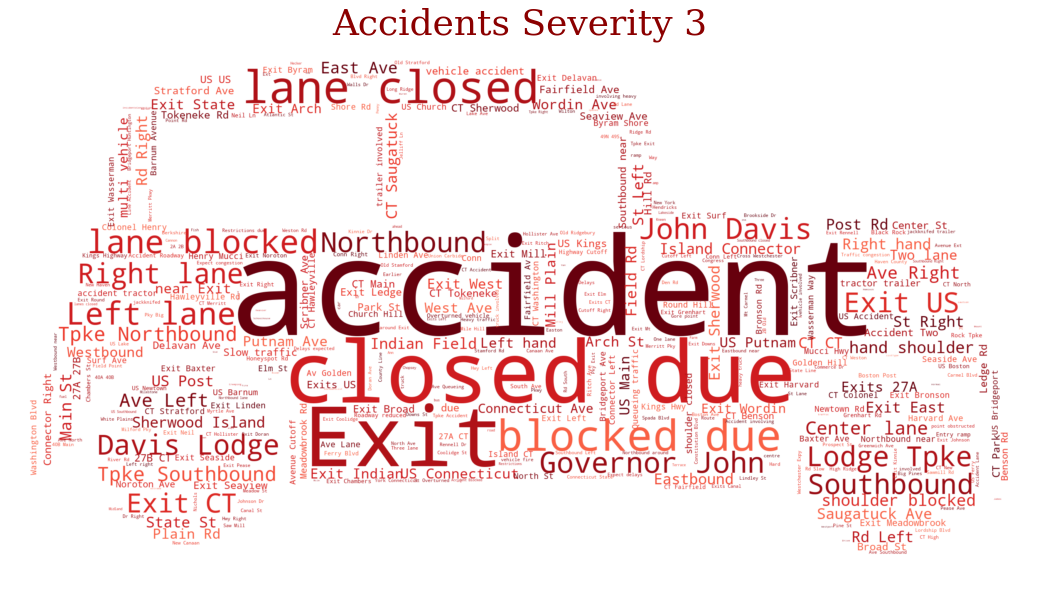

In [75]:
#Creating variable with data for this Word Cloud
textS3 = ' '.join(df_FF_S3['Description'].tolist())

#Creating Mask for Word Cloud
d = '../input/car-silhouette/'
car_mask = np.array(Image.open(d + 'Car_mask2.jpg'))
stop_words=set(STOPWORDS)

#Word Cloud Creation 
Car_wc=WordCloud(width=400,height=200,mask=car_mask,random_state=101, max_font_size=450,
                 min_font_size=1.5,stopwords=stop_words,background_color="white",
                 scale=3,max_words=400,collocations=True,colormap=cmap_R)

#Generate Word Cloud
Car_wc.generate(str(textS3))



#Show
fig=plt.figure(figsize=(30,10))
#plt.ylim(-300,2600)
#plt.xlim(0,7500)
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.axis("off")
plt.title('Accidents: Severity 3',fontdict=font)
plt.imshow(Car_wc,interpolation='bilinear')
plt.show()

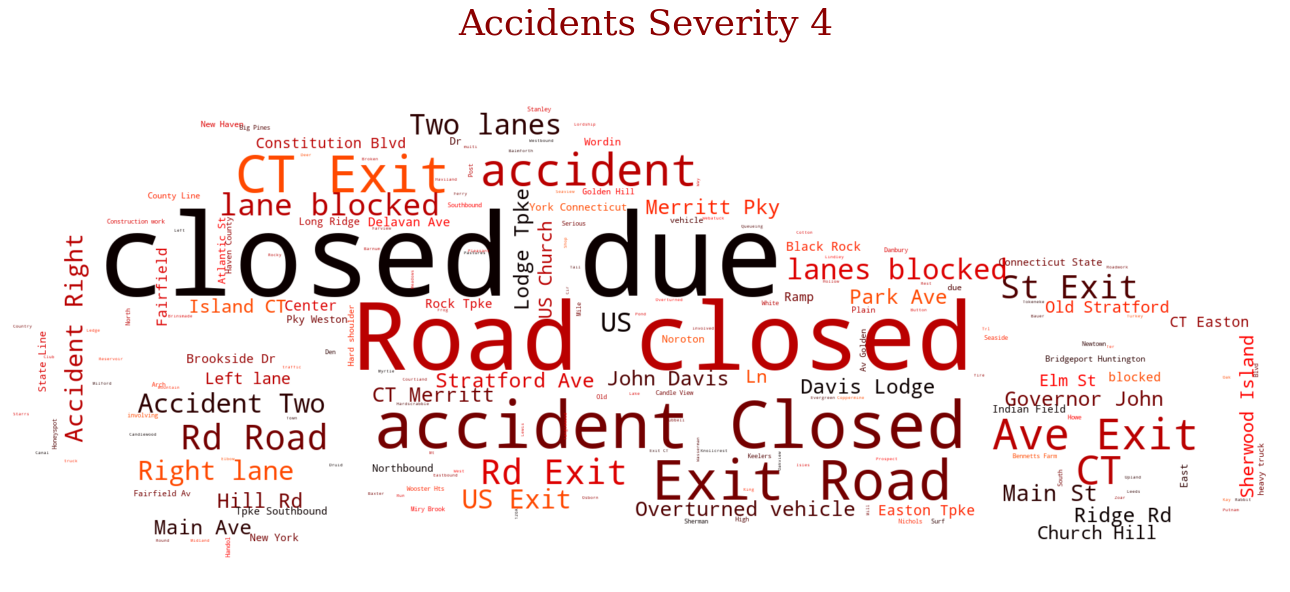

In [76]:
#Creating variable with data for this Word Cloud
textS4 = ' '.join(df_FF_S4['Description'].tolist())

#Creating Mask for Word Cloud
d = '../input/car-silhouette/'
car_mask = np.array(Image.open(d + 'Car_mask1.jpg'))
stop_words=set(STOPWORDS)

#Word Cloud Creation 
Car_wc=WordCloud(width=400,height=200,mask=car_mask,random_state=101, max_font_size=450,
                 min_font_size=1.5,stopwords=stop_words,background_color="white",
                 scale=3,max_words=400,collocations=True,colormap=cmap_H)

#Generate Word Cloud
Car_wc.generate(str(textS4))


#Show
fig=plt.figure(figsize=(30,10))
plt.ylim(500,1300)
plt.gca().invert_yaxis()
plt.axis("off")
plt.title('Accidents: Severity 4',fontdict=font)
plt.imshow(Car_wc,interpolation='bilinear')
plt.show()

**Severity 2:** We see words relating to partially blocked sections or road mostly on the right lane. The exit is also a significant contributor to this cloud. It seems as though these accidents happen when people are trying to get off the highway. 

**Severity 3:** The significant distinction we see it phrasing changed from blocked or obscured to closed. Yet stopped is still a factor. We also see lane closed coming up with some regularity.

**Severity 4:** The most critical term that jumps out to us as a differentiating factor is 'Road Closed' no longer are talking about lanes closure of blocks. Severity 4 means things are coming to a standstill. 

## 4.Machine Learning <a class="anchor" id="chapter4"></a>
Now for the grand finale, the Machine Learning the reason you are all here. Id likes to start and say thank you for reading this far you are part of a select few: the chosen the elite group of data connoisseur. I salute to you!

### 4.1 Model Selection <a class="anchor" id="section_4_1"></a>
Our choice of random forest is anything but random. I find this model so good I'm actively working to make sure I stay more agnostic in my applications. Still, this here isn't one of those situations. Random forests default hyperparameters seem to hit it out of the par more often than they miss. In 1995 the brilliant [Tin Kam Ho](https://en.wikipedia.org/wiki/Tin_Kam_Ho) created the first random forest making this method the same age as me, another star on the wall of the random forest. There are some definite advantages to the RFC. The main reason the Random Forest is that it's favorable for data sets with high dimensionality like this one! 

### 4.2 Training <a class="anchor" id="section_4_2"></a>
First, we need to break our data set into two separate pieces a training and testing set. We will use this training data to hone in our Random Forest before seeing how we did with the test data.

In [77]:
df_FF.head(1)

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Time_S,Weekday,TimeofDay,Season,Day_Type
194261,MapQuest,2,41.17836,-73.165665,0.01,Accident pedestrian involved on CT-130 Stratfo...,Central Ave,0,Bridgeport,06607-1310,53.1,41.540156,93.0,29.87,1.5,East,15.0,0.06,Heavy Rain,0,0,1,1,2016,11,30,15,2,Afternoon,Autumn,Weekday


In [78]:
df_FF.columns

Index(['Source', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Description', 'Street', 'Side', 'City', 'Zipcode', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Crossing', 'Junction', 'Traffic_Signal',
       'Sunrise_Sunset', 'Year', 'Month', 'Day', 'Time_S', 'Weekday',
       'TimeofDay', 'Season', 'Day_Type'],
      dtype='object')

Now we must first select the features we would like to use in our Random Forest. Then we need to make sure our forest knows what to do with said features. We put much work in at the beginning to make as many of the columns as we could into good old numbers, but some are still in categorical form. Remember when we talked about One-Hot encoding, but we would save it for later. Well, it's later, and now we must purge our data of these complicated categorical columns for clean 1's and 0's. We will be using a Pandas method called get_dummies to do our heavy lifting here.

In [79]:
#What we are trying to predict
target='Severity'

featuers_removed=['Description', 'Street','Zipcode','Source','Year', 'Month', 'Day', 
          'Time_S', 'Weekday']

#What we are using to predict our target
features=['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
          'Side', 'City','Temperature(F)','Wind_Chill(F)', 'Humidity(%)',
          'Pressure(in)', 'Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
          'Precipitation(in)','Weather_Condition', 'Junction', 'Crossing', 
          'Traffic_Signal','Sunrise_Sunset','TimeofDay', 'Season', 'Day_Type'] 

#One-Hot Encoding 
df_FF_Dummy=pd.get_dummies(df_FF[features],drop_first=True)
print(df_FF_Dummy.info())
df_FF_ML = df_FF_Dummy.reset_index()
df_FF_ML=df_FF_ML.drop('index',axis=1)
df_FF_ML.fillna(0)

#Train Test Split is a great function to break our data down. i made test 30% of total
y=df_FF_ML[target]
X=df_FF_ML.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6874 entries, 194261 to 3512164
Columns: 112 entries, Severity to Day_Type_Weekend
dtypes: float64(10), int64(6), uint8(96)
memory usage: 1.8 MB
None


In [80]:
#Running Model object
clf=RandomForestClassifier(n_estimators=250)

#Train Model with data
clf.fit(X_train,y_train)

#Run Model to predict accident Severity
predictions=clf.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, predictions)

# Append to the accuracy list
#accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score:",accuracy_score(y_test, predictions))
print('\n')
print('Confusion Matrix of results')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Classificaiton Report of results')
print(classification_report(y_test,predictions))


[Randon forest algorithm] accuracy_score: 0.7634512845370819


Confusion Matrix of results
[[  1   1   0   0]
 [  0 768 265   2]
 [  0 177 781   4]
 [  0  24  15  25]]


Classificaiton Report of results
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.79      0.74      0.77      1035
           3       0.74      0.81      0.77       962
           4       0.81      0.39      0.53        64

    accuracy                           0.76      2063
   macro avg       0.83      0.61      0.68      2063
weighted avg       0.77      0.76      0.76      2063



### 4.3 Model Evaluation <a class="anchor" id="section_4_3"></a>

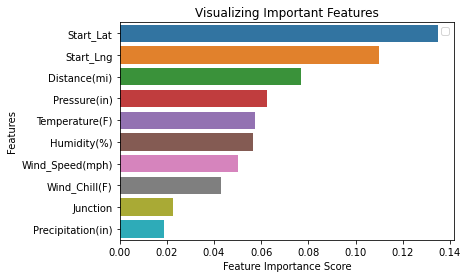

In [81]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## 5.Conclusion <a class="anchor" id="chapter5"></a>

As you can see in the graph above we have identified the weight of each of our atributes on the severity of the accident. Again sevarity is in reguards to the accidents impact on traffic. We see that the most impactful part of an accident is its location. this information paired with our first colium map which identified concentrations of accidents around exits lets us know that there is where our policy makers should focus their efforts. we have bottle necks and when they are interfeered with they cause massive backlog. this along with weather are the most severer indicators 

In [83]:
target='Severity'
featuers_removed=['Description', 'Street','Zipcode','Source','Year','Month','Day',
                  'Time_S','Weekday','Distance(mi)','Start_Lat', 'Start_Lng']

features=['Severity',
          'Side', 'City','Temperature(F)','Wind_Chill(F)', 'Humidity(%)',
          'Pressure(in)', 'Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
          'Precipitation(in)','Weather_Condition', 'Crossing', 'Junction', 
          'Traffic_Signal','Sunrise_Sunset','TimeofDay', 'Season', 'Day_Type'] 


df_FF_Dummy=pd.get_dummies(df_FF[features],drop_first=True)
print(df_FF_Dummy.info())
df_FF_ML=df_FF_Dummy
df_FF_ML = df_FF_ML.reset_index()
df_FF_ML=df_FF_ML.drop('index',axis=1)
df_FF_ML.fillna(0)

#Train Test Split is a great function to break our data down. i made test 30% of total
y=df_FF_ML[target]
X=df_FF_ML.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6874 entries, 194261 to 3512164
Columns: 109 entries, Severity to Day_Type_Weekend
dtypes: float64(7), int64(6), uint8(96)
memory usage: 1.7 MB
None


In [84]:
clf=RandomForestClassifier(n_estimators=250)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
# Get the accuracy score
acc=accuracy_score(y_test, predictions)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[Randon forest algorithm] accuracy_score: 0.618.
[[  0   2   0   0]
 [  0 659 372   4]
 [  0 361 592   9]
 [  0  18  23  23]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.63      0.64      0.64      1035
           3       0.60      0.62      0.61       962
           4       0.64      0.36      0.46        64

    accuracy                           0.62      2063
   macro avg       0.47      0.40      0.43      2063
weighted avg       0.62      0.62      0.62      2063



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


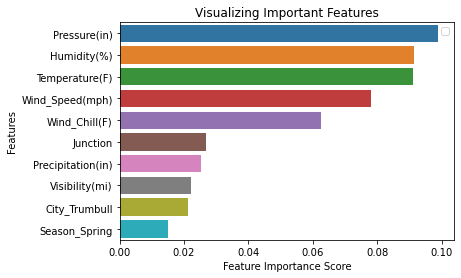

In [85]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [86]:
k=20
feature_imp.sort_values(ascending=False)[:k]

Pressure(in)                       0.098954
Humidity(%)                        0.091260
Temperature(F)                     0.091204
Wind_Speed(mph)                    0.078031
Wind_Chill(F)                      0.062433
Junction                           0.026925
Precipitation(in)                  0.025117
Visibility(mi)                     0.022178
City_Trumbull                      0.021202
Season_Spring                      0.015107
Day_Type_Weekend                   0.014281
TimeofDay_Afternoon                0.014208
Side                               0.013211
City_Bridgeport                    0.013153
Season_Summer                      0.012614
TimeofDay_Morning                  0.012174
Weather_Condition_Mostly Cloudy    0.012037
Sunrise_Sunset                     0.011932
City_Danbury                       0.011719
City_Greenwich                     0.011428
dtype: float64